# Experiment 4

This experiment explore the growth of local networks in CBN with Linear topology. Its important see what happened with the Linear CBN with more local networks

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
# df = pd.read_csv("outputs/exp4_cores_1024_5/data.csv")
df = pd.read_csv("outputs/exp4_cores_1024_500/data.csv")
df.keys()

Index(['i_sample', 'n_cores', 'step', 'method', 'execution_time'], dtype='object')

In [8]:
df

,i_sample,n_cores,step,method,execution_time
0,1,2,1,1,63.465530
1,1,2,1,2,30.843573
2,1,2,1,3,32.282284
3,1,2,2,1,1.083082
4,1,2,2,2,1.987877
...,...,...,...,...,...
11293,269,24,1,2,8.471452
11294,269,24,1,3,9.265794
11295,269,24,2,1,1.068469
11296,269,24,2,2,26.450371


## General Statistics

### Statistics

In [9]:
mean_times = df.groupby(['step', 'method', 'n_cores'])['execution_time'].mean().reset_index()
table = mean_times.pivot(index=['step', 'method'], columns='n_cores', values='execution_time')
table

n_cores             2          4          8          12         16         20  \
step method                                                                     
1    1       81.556470  81.056767  81.355716  81.981026  81.359544  83.168622   
     2       41.248051  20.250088  11.314734   8.507729   7.624437   7.397952   
     3       41.310939  20.364374  11.060387   8.528453   7.525018   7.462548   
2    1        1.238064   1.231322   1.123133   1.052229   1.087188   1.049081   
     2        2.641974   4.319437   7.354457  10.200748  13.587120  17.166526   
     3        2.725739   4.318124   7.370641  10.389779  14.038383  17.639120   

n_cores             24  
step method             
1    1       81.926048  
     2        7.184517  
     3        7.335475  
2    1        1.043483  
     2       20.109652  
     3       20.399936

In [12]:
import pandas as pd

# Calcular tiempos medios de ejecución agrupados por step, method
mean_times = df.groupby(['step', 'method','n_cores'])['execution_time'].mean().reset_index()

# Ordenar y pivotar la tabla
mean_times = mean_times.sort_values(by=['step', 'method','n_cores'])
table = mean_times.pivot(index=['step', 'method'], columns='n_cores', values='execution_time')

# Convertir el índice en columnas y renombrar
table_reset = table.reset_index().rename(columns={'step': 'Stage', 'method': 'Method'})

# Lista de columnas
cols = table_reset.columns.tolist()
n_bool_cols = len(cols) - 2

# Definir formato de columnas para LaTeX
col_format = "c|l|" + "r|" * n_bool_cols
col_format = col_format.rstrip("|")

latex_str = "\\begin{tabular}{" + col_format + "}\n\\hline\n"
latex_str += " &  & \\multicolumn{" + str(n_bool_cols) + "}{c}{\\textbf{\\# of Cores}} \\\\ \\hline\n"
latex_str += "{\\bf Stage} & {\\bf Method} " + " & ".join([f"{{\\bf {col}}}" for col in cols[2:]]) + " \\\\ \\hline\n"

# Agrupar por Stage para combinar las celdas de esa columna
grouped = table_reset.groupby("Stage")
for stage, group in grouped:
    n_rows = group.shape[0]
    first = True
    for _, row in group.iterrows():
        stage_cell = f"\\multirow{{{n_rows}}}{{*}}{{Step {int(stage)}}}" if first else ""
        first = False
        row_line = f"{stage_cell} & {row['Method']}"

        # Recorrer columnas de redes locales
        for col in cols[2:]:
            val = row[col]
            cell = f"{val:.4f}s" if not pd.isna(val) else "--"
            row_line += " & " + cell

        row_line += " \\\\"
        latex_str += row_line + "\n"

    latex_str += "\\hline\n"

latex_str += "\\end{tabular}"

print(latex_str)


\begin{tabular}{c|l|r|r|r|r|r|r|r}
\hline
 &  & \multicolumn{7}{c}{\textbf{\# of Cores}} \\ \hline
{\bf Stage} & {\bf Method} {\bf 2} & {\bf 4} & {\bf 8} & {\bf 12} & {\bf 16} & {\bf 20} & {\bf 24} \\ \hline
\multirow{3}{*}{Step 1} & 1.0 & 81.5565s & 81.0568s & 81.3557s & 81.9810s & 81.3595s & 83.1686s & 81.9260s \\
 & 2.0 & 41.2481s & 20.2501s & 11.3147s & 8.5077s & 7.6244s & 7.3980s & 7.1845s \\
 & 3.0 & 41.3109s & 20.3644s & 11.0604s & 8.5285s & 7.5250s & 7.4625s & 7.3355s \\
\hline
\multirow{3}{*}{Step 2} & 1.0 & 1.2381s & 1.2313s & 1.1231s & 1.0522s & 1.0872s & 1.0491s & 1.0435s \\
 & 2.0 & 2.6420s & 4.3194s & 7.3545s & 10.2007s & 13.5871s & 17.1665s & 20.1097s \\
 & 3.0 & 2.7257s & 4.3181s & 7.3706s & 10.3898s & 14.0384s & 17.6391s & 20.3999s \\
\hline
\end{tabular}


### Boxplots and Violin Plots

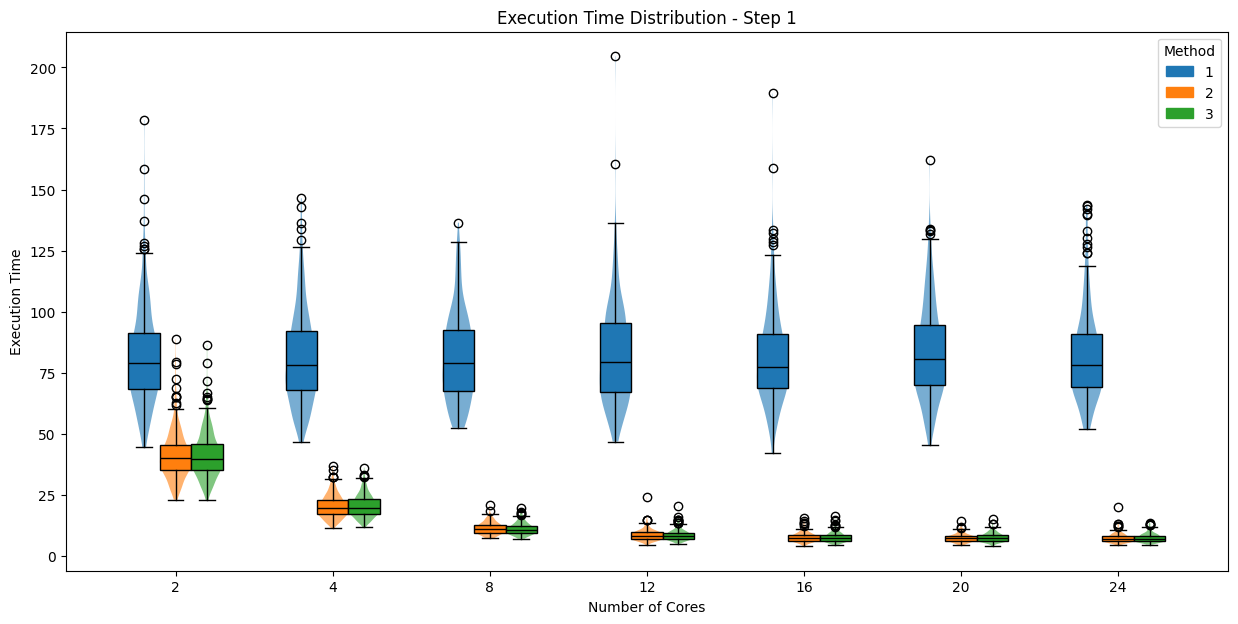

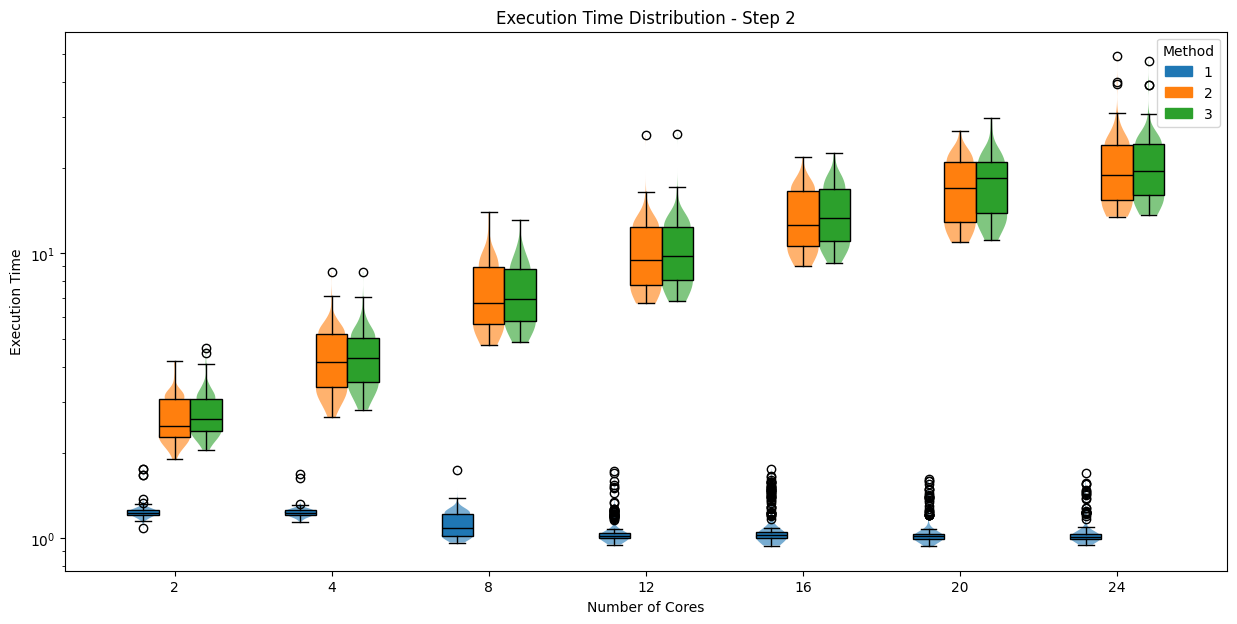

In [13]:
# Valores únicos ordenados para step, method y n_cores
steps = sorted(df['step'].unique())
methods = sorted(df['method'].unique())
n_cores_values = sorted(df['n_cores'].unique())

# Graficar boxplots y violin plots para cada step
for step in steps:
    fig, ax = plt.subplots(figsize=(15, 7))
    positions = np.arange(len(n_cores_values))  # Posiciones en el eje x
    width = 0.2  # Ancho de cada caja/violin

    # Graficar boxplots para cada método
    for i, method in enumerate(methods):
        data = [
            df[
                (df['step'] == step) &
                (df['method'] == method) &
                (df['n_cores'] == n)
            ]['execution_time'].dropna()
            for n in n_cores_values
        ]
        ax.boxplot(
            data,
            positions=positions + i * width - width,
            widths=width,
            patch_artist=True,
            boxprops=dict(facecolor=f"C{i}"),
            medianprops=dict(color='black')
        )

    # Graficar violin plots para cada método
    for i, method in enumerate(methods):
        data = [
            df[
                (df['step'] == step) &
                (df['method'] == method) &
                (df['n_cores'] == n)
            ]['execution_time'].dropna().values
            for n in n_cores_values
        ]
        parts = ax.violinplot(
            data,
            positions=positions + i * width - width,
            widths=width,
            showmeans=False,
            showextrema=False,
            showmedians=False
        )
        for pc in parts['bodies']:
            pc.set_facecolor(f"C{i}")
            pc.set_alpha(0.6)

    ax.set_xticks(positions)
    ax.set_xticklabels(n_cores_values)
    ax.set_xlabel("Number of Cores")
    ax.set_ylabel("Execution Time")
    ax.set_title(f"Execution Time Distribution - Step {step}")
    ax.legend(
        [plt.Rectangle((0, 0), 1, 1, color=f"C{i}") for i in range(len(methods))],
        methods,
        title="Method"
    )

    # Para el step 2, usar escala logarítmica en el eje y
    if step == 2:
        ax.set_yscale('log')

    plt.show()


### Histograms

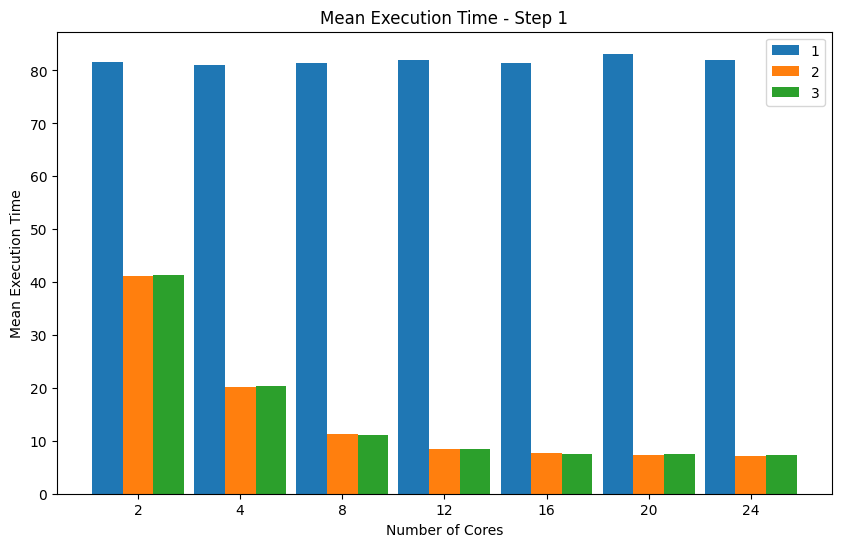

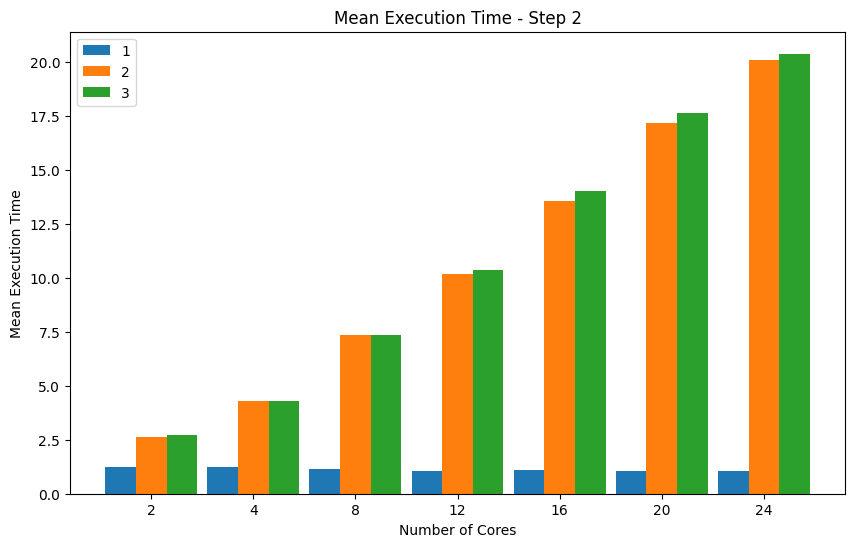

In [14]:
# Crear histogramas para los tiempos de ejecución promedio agrupados por step y method usando n_cores
unique_steps = df['step'].unique()
unique_methods = df['method'].unique()
unique_n_cores = sorted(df['n_cores'].unique())

# Para cada step, se crea un gráfico de barras para los tiempos de ejecución promedio
for step in unique_steps:
    fig, ax = plt.subplots(figsize=(10, 6))
    data_step = mean_times[mean_times['step'] == step]

    width = 0.3  # Ancho de cada barra
    positions = np.arange(len(unique_n_cores))

    for i, method in enumerate(unique_methods):
        means = [
            data_step[
                (data_step['n_cores'] == n) & (data_step['method'] == method)
                ]['execution_time'].values[0]
            if not data_step[(data_step['n_cores'] == n) & (data_step['method'] == method)].empty
            else 0
            for n in unique_n_cores
        ]
        ax.bar(positions + i * width, means, width=width, label=method, color=f"C{i}")

    ax.set_xticks(positions + width)
    ax.set_xticklabels(unique_n_cores)
    ax.set_xlabel("Number of Cores")
    ax.set_ylabel("Mean Execution Time")
    ax.set_title(f"Mean Execution Time - Step {step}")
    ax.legend()
    plt.show()
